In [40]:
import pandas
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from sklearn.cluster import KMeans

In [41]:
df=pandas.read_csv('C:/Users/culle/Documents/Python/securities.csv')


In [42]:
pandas.set_option('display.max_columns', None)
df['totalPrice'] = df['qty'] * df['price']
del df["execType"]
del df['orderStatus']
del df['tgwIp']
del df['submittingPbuid']
del df["reportingPbuid"]
del df["counterIp"]
del df['securityIdSource']
del df["applId"]
del df["tgwInsertRspLength"]
del df["counterInsertReqLength"]

In [10]:
df[["transactTime","orderStatus"]].groupby("orderStatus").mean()

,transactTime
orderStatus,
NEW,2.023035e+16


In [11]:
df[["insertLinkLatency","clientInsertReqLength"]].groupby("clientInsertReqLength").mean()

,insertLinkLatency
clientInsertReqLength,
845,4.109858e+09
846,3.924044e+09
847,4.009705e+09
848,3.928918e+09
849,4.001148e+09
877,5.909643e+09
878,4.086031e+09
879,3.920164e+09
880,3.810618e+09


In [14]:
df.corr(method = 'pearson')

C:\Users\culle\AppData\Local\Temp\ipykernel_14280\3294333281.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson')


,Unnamed: 0,insertLinkLatency,counterInsertLatency,tgwLatency,counterStatusLatency,clientInsertReqId,clientInsertReqLength,counterInsertReqId,counterInsertReqLength,tgwInsertRspId,...,setId,securityId,fundAccountId,qty,price,reportingPbuid,transactTime,execId,accountId,orderRef
Unnamed: 0,1.000000,-0.028662,-0.028382,-0.016427,-0.005475,0.155938,-0.083411,0.155938,NaN,0.155938,...,-0.294141,-0.002006,-0.029493,0.005724,-0.016301,NaN,-0.402232,-0.006385,0.051403,-0.076614
insertLinkLatency,-0.028662,1.000000,0.749883,0.550853,0.614402,0.001394,0.027903,0.001394,NaN,0.001394,...,0.012635,0.019265,0.014093,0.011362,-0.003305,NaN,0.026679,-0.012679,-0.001283,0.010706
counterInsertLatency,-0.028382,0.749883,1.000000,-0.014985,0.383290,-0.020262,0.073586,-0.020262,NaN,-0.020262,...,0.026303,0.014924,0.033894,0.003392,-0.004696,NaN,0.029149,0.001181,-0.017015,0.056797
tgwLatency,-0.016427,0.550853,-0.014985,1.000000,0.002854,0.027553,-0.040007,0.027553,NaN,0.027553,...,-0.011220,0.022118,-0.014811,0.015797,0.000053,NaN,0.009092,-0.024542,0.013827,-0.039528
counterStatusLatency,-0.005475,0.614402,0.383290,0.002854,1.000000,-0.004174,0.013557,-0.004174,NaN,-0.004174,...,0.007335,-0.005969,0.004178,0.001194,-0.001201,NaN,0.009835,0.000833,0.003779,-0.005413
clientInsertReqId,0.155938,0.001394,-0.020262,0.027553,-0.004174,1.000000,-0.165585,1.000000,NaN,1.000000,...,-0.420251,0.016398,-0.069444,0.005755,-0.023859,NaN,-0.337718,-0.000234,0.091201,-0.159691
clientInsertReqLength,-0.083411,0.027903,0.073586,-0.040007,0.013557,-0.165585,1.000000,-0.165585,NaN,-0.165585,...,0.216632,-0.050323,0.515371,-0.019929,0.074422,NaN,0.176842,-0.000876,-0.331549,0.956750
counterInsertReqId,0.155938,0.001394,-0.020262,0.027553,-0.004174,1.000000,-0.165585,1.000000,NaN,1.000000,...,-0.420251,0.016398,-0.069444,0.005755,-0.023859,NaN,-0.337718,-0.000234,0.091201,-0.159691
counterInsertReqLength,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tgwInsertRspId,0.155938,0.001394,-0.020262,0.027553,-0.004174,1.000000,-0.165585,1.000000,NaN,1.000000,...,-0.420251,0.016398,-0.069444,0.005755,-0.023859,NaN,-0.337718,-0.000234,0.091201,-0.159691


<Axes: title={'center': 'clientInsertReqLength vs insertLinkLatency'}, xlabel='clientInsertReqLength', ylabel='counterStatusLatency'>

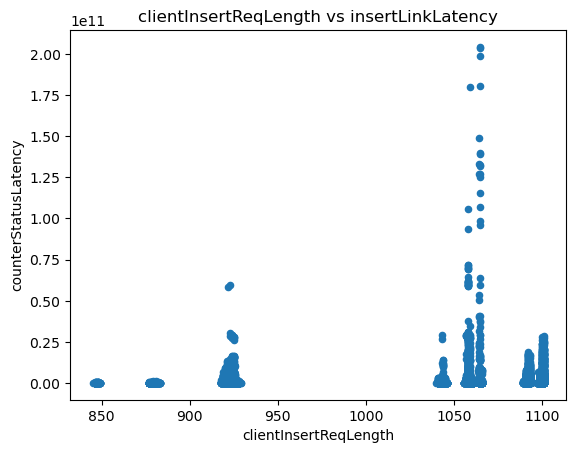

In [14]:
df.plot.scatter(x="clientInsertReqLength", y="counterStatusLatency", title="clientInsertReqLength vs insertLinkLatency")

<Axes: title={'center': 'clientInsertReqLength vs insertLinkLatency'}, xlabel='qty', ylabel='insertLinkLatency'>

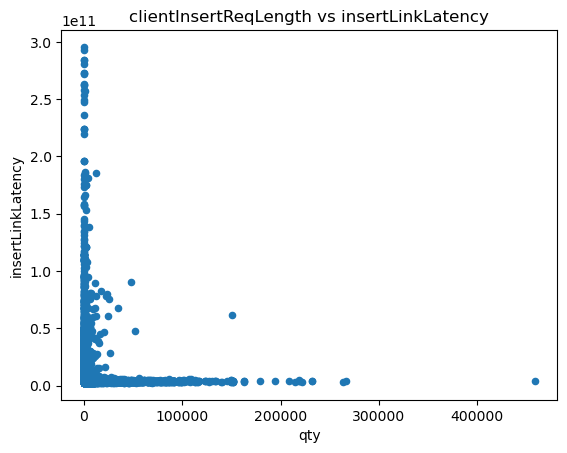

In [20]:
df.plot.scatter(x="qty", y="insertLinkLatency", title="clientInsertReqLength vs insertLinkLatency")

<Axes: title={'center': 'price vs insertLinkLatency'}, xlabel='price', ylabel='insertLinkLatency'>

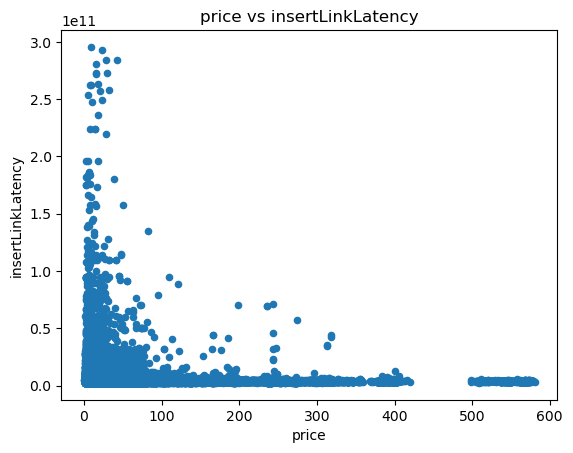

In [21]:
df.plot.scatter(x="price", y="insertLinkLatency", title="price vs insertLinkLatency")

<Axes: title={'center': 'clientInsertReqLength vs insertLinkLatency'}, xlabel='accountId', ylabel='transactTime'>

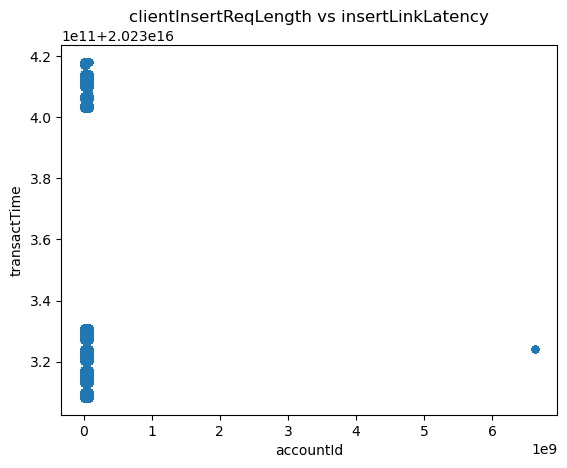

In [45]:
df.plot.scatter(x="accountId", y="transactTime", title="clientInsertReqLength vs insertLinkLatency")

In [31]:
df["branchId"].nunique()

6

In [33]:
df["orderType"].nunique()

2

In [35]:
df["direction"].nunique()

2

In [21]:
df['datetime'] = pandas.to_datetime(df['clientInsertReqTimestamp'])
df['time'] = df['datetime'].dt.time

In [58]:
#logistic Regression x = clientInsertReqLength, y = counterInsertLatency
x = df['clientInsertReqId']
y = df['insertLinkLatency']
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(x,y)
predictions = model.predict(x)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Predictions:', predictions)

ValueError: Expected 2D array, got 1D array instead:
array=[4.21481804e+08 5.31453271e+09 5.31453271e+09 ... 5.31313908e+09
 5.31314171e+09 5.31314562e+09].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<Axes: title={'center': 'clientInsertReqLength vs insertLinkLatency'}, xlabel='totalPrice', ylabel='counterStatusLatency'>

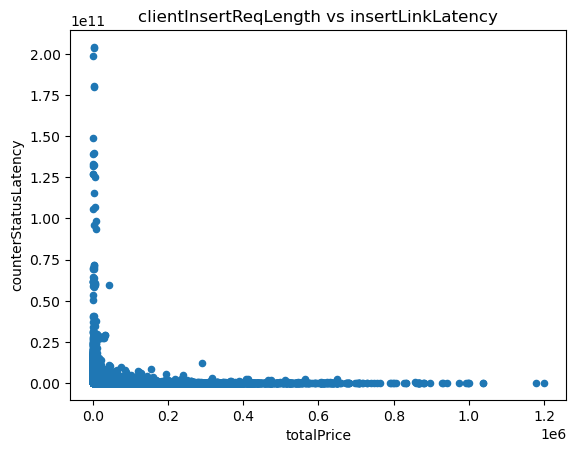

In [26]:
df.plot.scatter(x="totalPrice", y="counterStatusLatency", title="clientInsertReqLength vs insertLinkLatency")

In [31]:
groups = []
for day, group_data in df.groupby('totalPrice')['insertLinkLatency']:
    groups.append(group_data.tolist())
f_value, p_value = f_oneway(*groups)

print('F-value:', f_value)
print('p-value:', p_value)

F-value: 1.8080523693980368
p-value: 0.0


C:\Users\culle\AppData\Local\Temp\ipykernel_7524\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

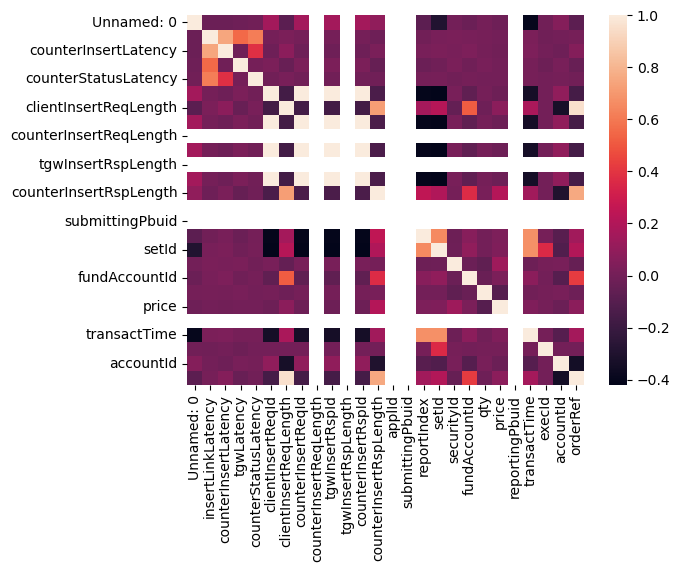

In [6]:
sns.heatmap(df.corr())

C:\Users\culle\AppData\Local\Temp\ipykernel_7524\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

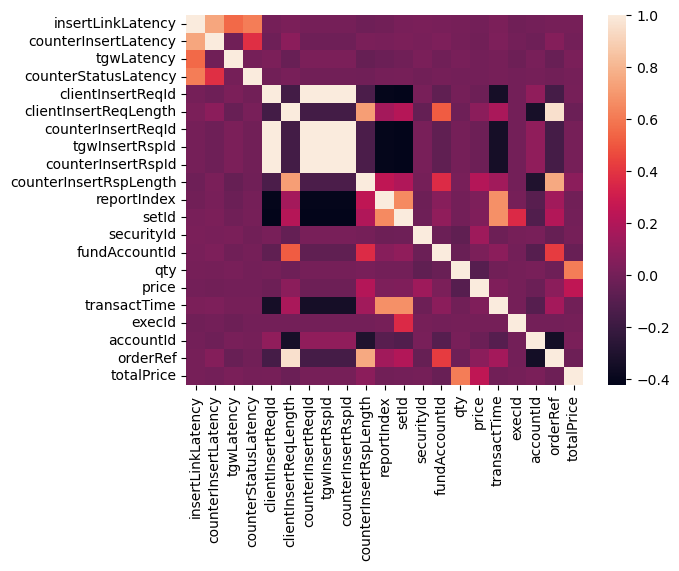

In [34]:
sns.heatmap(df.corr())

In [20]:
del df["Unnamed: 0"]

In [32]:
df.head()

,clientInsertReqTimestamp,insertLinkLatency,counterInsertLatency,tgwLatency,counterStatusLatency,clientInsertReqId,clientInsertReqLength,counterInsertReqId,tgwInsertRspId,counterInsertRspId,counterInsertRspLength,clientIp,reportIndex,setId,securityId,orderLocalId,fundAccountId,branchId,direction,orderType,qty,price,transactTime,orderSysId,execId,accountId,orderRef,totalPrice,localId
0,2023-04-14 05:06:13.700,5145660703,608577922,4269850016,267232765,421481804,1059,421481815,421481869,421481870,524,10.140.9.15,75812,2,2624,G3K316GP,899266734,G3,SELL,LIMIT_ORDER,2100,20.08,20230414130705850,0060RT2SN001XUQE,102000035717769,3858762,83895124,42168.0,K316G
1,2023-03-09 06:58:07.548,4018348562,645026015,3067017610,306304937,5314532708,923,5314532730,5314532778,5314532783,519,10.140.3.5,0,0,300182,CJK6169S,899240386,CJ,SELL,LIMIT_ORDER,1500,4.26,20230309145859670,0020RR84IQ02O4PI,104000045196342,79152343,9221,6390.0,K6169
2,2023-03-09 06:58:07.548,4157664047,805954407,3159600265,192109375,5314532712,924,5314532740,5314532785,5314532797,521,10.140.3.8,0,0,300182,CJK6169T,899239011,CJ,SELL,LIMIT_ORDER,2300,4.26,20230309145859670,0020RR84IQ02O4PJ,104000045196345,79152181,11947,9798.0,K6169
3,2023-03-17 06:59:07.824,3375678703,675471047,2393301093,306906563,9736933476,924,9736933513,9736933573,9736933594,521,10.140.3.5,0,0,301079,CJK616S3,899259981,CJ,BUY,LIMIT_ORDER,200,26.35,20230317145959950,0020RRMZ450257ZD,103000048722691,79153386,10926,5270.0,K616S
4,2023-03-17 06:59:07.824,3635065344,897603078,2249966141,487496125,9736933482,924,9736933527,9736933576,9736933613,521,10.140.3.8,0,0,301079,CJK616S4,899239011,CJ,BUY,LIMIT_ORDER,300,26.35,20230317145959950,0020RRMZ450257ZE,103000048722697,79152181,12813,7905.0,K616S


In [31]:
df['localId'] = df['orderLocalId'].str.slice(2,-1)

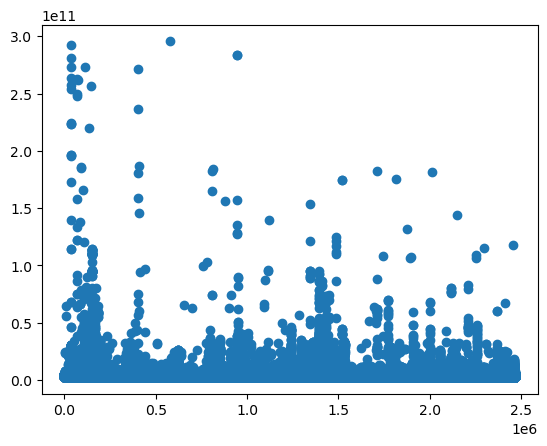

In [5]:
plt.scatter(list(range(len(df))), df['insertLinkLatency'])

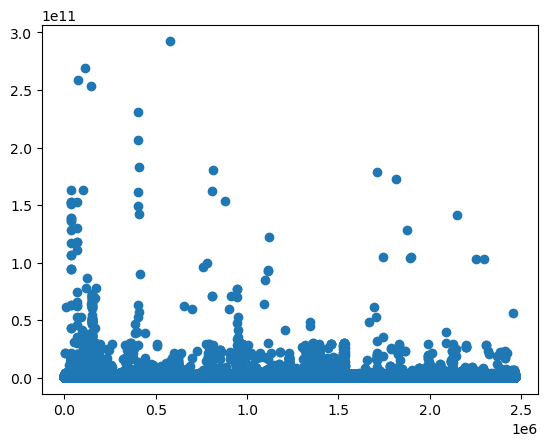

In [6]:
plt.scatter(list(range(len(df))), df['counterInsertLatency'])

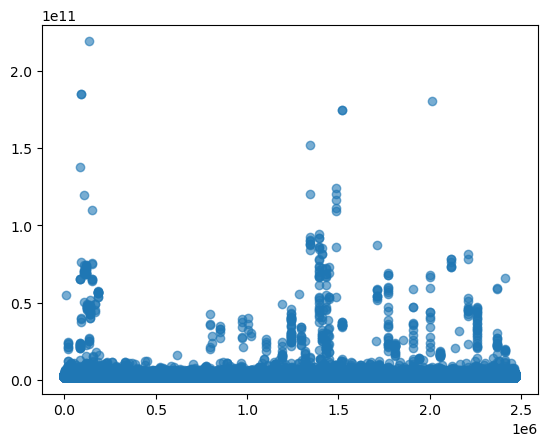

In [9]:
plt.scatter(list(range(len(df))), df['tgwLatency'], alpha = 0.6)

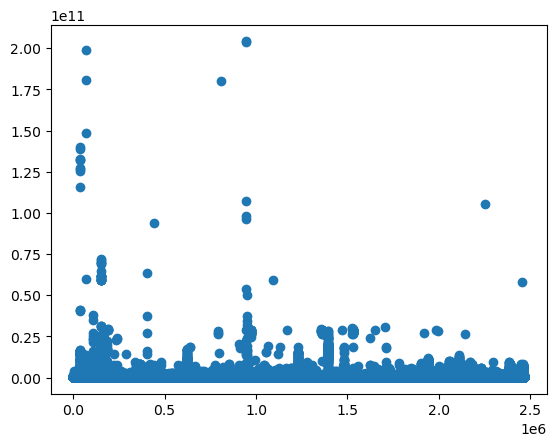

In [8]:
plt.scatter(list(range(len(df))), df['counterStatusLatency'])

<Axes: xlabel='direction', ylabel='insertLinkLatency'>

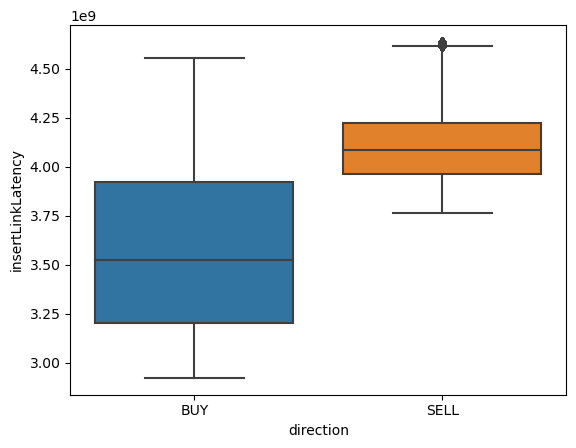

In [3]:
df['insertLinkLatency'].mean()
lower_percentile = 0.05
upper_percentile = 0.95
grouped = df.groupby('direction')
filtered_data = []
for _, group in grouped:
    lower_bound = group['insertLinkLatency'].quantile(lower_percentile)
    upper_bound = group['insertLinkLatency'].quantile(upper_percentile)
    filtered_group = group[(group['insertLinkLatency'] >= lower_bound) & (group['insertLinkLatency'] <= upper_bound)]
    filtered_data.append(filtered_group)
filtered_df = pandas.concat(filtered_data)

# Plot the box and whisker plot without outliers using seaborn
sns.boxplot(data=filtered_df, x='direction', y='insertLinkLatency')

<Axes: xlabel='direction', ylabel='counterInsertLatency'>

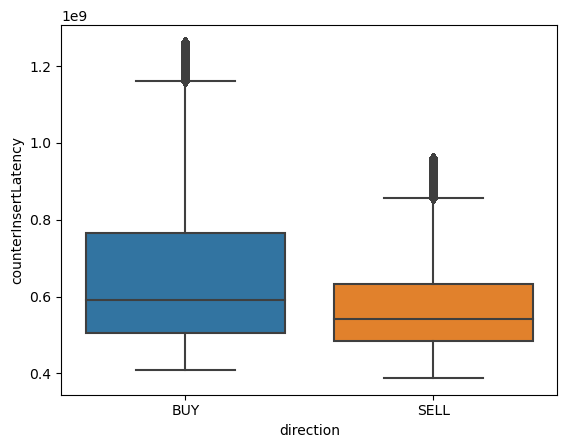

In [4]:
df['counterInsertLatency'].mean()
lower_percentile = 0.05
upper_percentile = 0.95
grouped = df.groupby('direction')
filtered_data = []
for _, group in grouped:
    lower_bound = group['counterInsertLatency'].quantile(lower_percentile)
    upper_bound = group['counterInsertLatency'].quantile(upper_percentile)
    filtered_group = group[(group['counterInsertLatency'] >= lower_bound) & (group['counterInsertLatency'] <= upper_bound)]
    filtered_data.append(filtered_group)
filtered_df = pandas.concat(filtered_data)

# Plot the box and whisker plot without outliers using seaborn
sns.boxplot(data=filtered_df, x='direction', y='counterInsertLatency')

<Axes: xlabel='direction', ylabel='tgwLatency'>

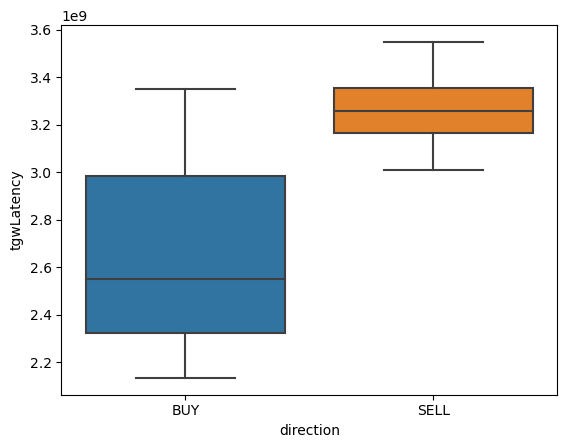

In [5]:
df['tgwLatency'].mean()
lower_percentile = 0.05
upper_percentile = 0.95
grouped = df.groupby('direction')
filtered_data = []
for _, group in grouped:
    lower_bound = group['tgwLatency'].quantile(lower_percentile)
    upper_bound = group['tgwLatency'].quantile(upper_percentile)
    filtered_group = group[(group['tgwLatency'] >= lower_bound) & (group['tgwLatency'] <= upper_bound)]
    filtered_data.append(filtered_group)
filtered_df = pandas.concat(filtered_data)

# Plot the box and whisker plot without outliers using seaborn
sns.boxplot(data=filtered_df, x='direction', y='tgwLatency')

<Axes: xlabel='direction', ylabel='counterStatusLatency'>

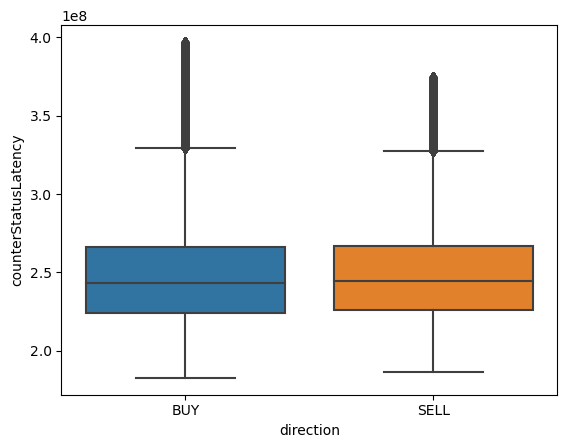

In [6]:
df['counterStatusLatency'].mean()
lower_percentile = 0.05
upper_percentile = 0.95
grouped = df.groupby('direction')
filtered_data = []
for _, group in grouped:
    lower_bound = group['counterStatusLatency'].quantile(lower_percentile)
    upper_bound = group['counterStatusLatency'].quantile(upper_percentile)
    filtered_group = group[(group['counterStatusLatency'] >= lower_bound) & (group['counterStatusLatency'] <= upper_bound)]
    filtered_data.append(filtered_group)
filtered_df = pandas.concat(filtered_data)

# Plot the box and whisker plot without outliers using seaborn
sns.boxplot(data=filtered_df, x='direction', y='counterStatusLatency')

In [7]:
df.tail()

,Unnamed: 0,clientInsertReqTimestamp,insertLinkLatency,counterInsertLatency,tgwLatency,counterStatusLatency,clientInsertReqId,clientInsertReqLength,counterInsertReqId,counterInsertReqLength,tgwInsertRspId,tgwInsertRspLength,counterInsertRspId,counterInsertRspLength,tgwIp,counterIp,clientIp,applId,submittingPbuid,reportIndex,setId,securityId,securityIdSource,orderLocalId,fundAccountId,branchId,direction,orderType,qty,price,reportingPbuid,transactTime,orderSysId,execId,execType,orderStatus,accountId,orderRef
2467514,2467514,2023-03-09 06:56:05.501,4974722735,479879953,4211475500,283367282,5313133573,922,5313133583,121,5313133625,201,5313133629,518,10.140.10.106,10.140.10.9,10.140.3.5,10,392403,0,0,7,SZSE,CJK6169P,899240386,CJ,SELL,LIMIT_ORDER,500,7.58,392403,20230309145657620,0020RR84IQ02NRVM,101000044058241,NEW,NEW,79152343,9220
2467515,2467515,2023-03-09 06:56:06.028,4070028594,564468938,3226890062,278669594,5313138255,926,5313138265,121,5313138297,201,5313138307,523,10.140.10.106,10.140.10.9,10.140.2.34,10,392403,0,0,300619,SZSE,A7K10DFN,899250379,A7,SELL,LIMIT_ORDER,200,63.88,392403,20230309145658150,0020RR84IQ02NS24,101000044060972,NEW,NEW,34828592,2719154
2467516,2467516,2023-03-09 06:56:06.123,4001887797,481582359,3294480657,225824781,5313139085,1058,5313139095,121,5313139109,201,5313139111,522,10.140.10.106,10.140.10.9,10.140.9.15,10,392403,0,0,300570,SZSE,G3K31WO1,899295748,G3,SELL,LIMIT_ORDER,400,21.73,392403,20230309145658240,0020RR84IQ02NS4H,103000043748781,NEW,NEW,3862671,83901472
2467517,2467517,2023-03-09 06:56:06.429,3920690625,401831672,3264842171,254016782,5313141713,880,5313141716,121,5313141736,201,5313141739,522,10.140.10.106,10.140.10.9,10.140.2.108,10,392403,0,0,2343,SZSE,A7K10DFP,899243047,A7,SELL,LIMIT_ORDER,100,6.47,392403,20230309145658550,0020RR84IQ02NS6W,103000043750176,NEW,NEW,34828519,8814459
2467518,2467518,2023-03-09 06:56:06.889,3241149265,540814484,2412583531,287751250,5313145621,1059,5313145641,121,5313145666,201,5313145675,523,10.140.10.106,10.140.10.9,10.140.9.15,10,392403,0,0,927,SZSE,G3K31WO3,899282383,G3,BUY,LIMIT_ORDER,5300,3.05,392403,20230309145659010,0020RR84IQ02NSBT,101000044064180,NEW,NEW,3861290,83894947


In [9]:
df['clientIp'].nunique()

9

In [10]:
df['setId'].nunique()

5

In [11]:
df['fundAccountId'].nunique()

24

In [19]:
df['tgwInsertRspId'].nunique()

2438904

In [5]:
df['time'] = pandas.to_datetime(df['clientInsertReqTimestamp']).dt.time

In [7]:
df['time'] = pandas.to_datetime(df['clientInsertReqTimestamp'])
df['time'].dt.time

0          05:06:13.700000
1          06:58:07.548000
2          06:58:07.548000
3          06:59:07.824000
4          06:59:07.824000
                ...       
2467514    06:56:05.501000
2467515    06:56:06.028000
2467516    06:56:06.123000
2467517    06:56:06.429000
2467518    06:56:06.889000
Name: time, Length: 2467519, dtype: object

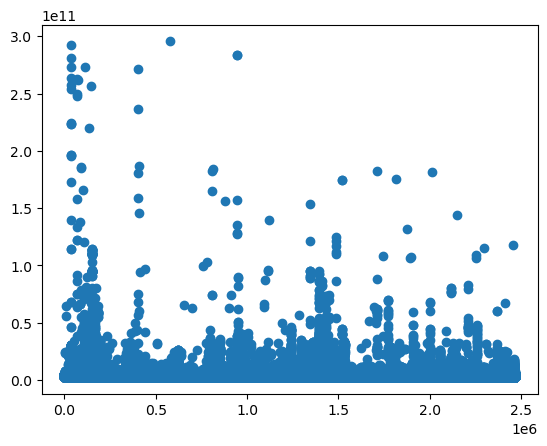

In [9]:
plt.scatter(list(range(len(df))), df['insertLinkLatency'])

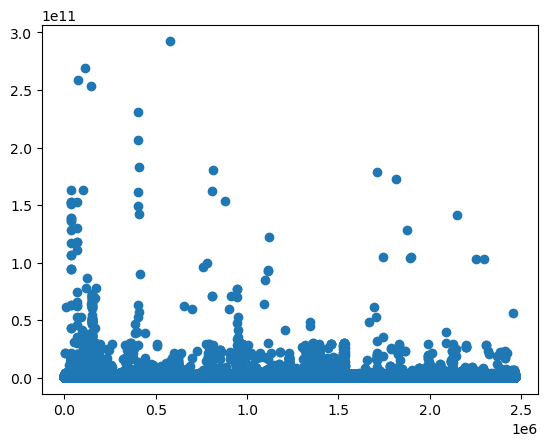

In [10]:
plt.scatter(list(range(len(df))), df['counterInsertLatency'])

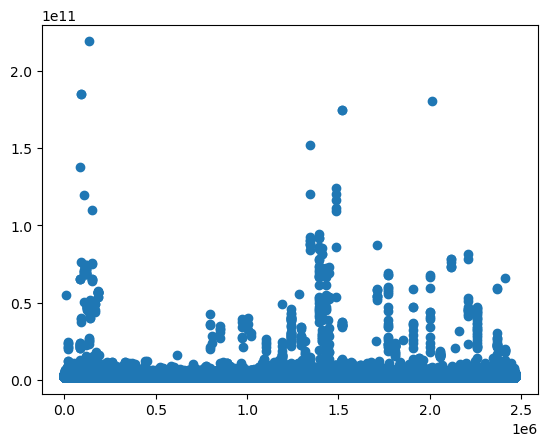

In [11]:
plt.scatter(list(range(len(df))), df['tgwLatency'])

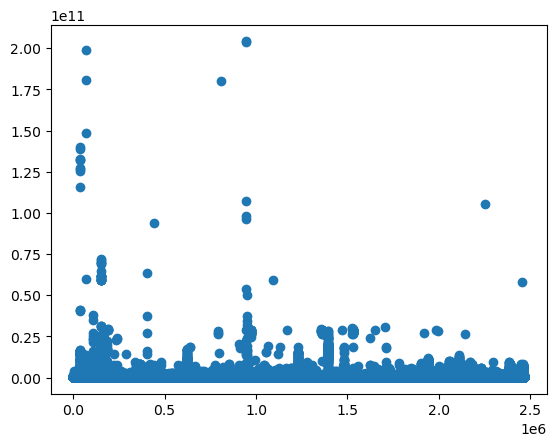

In [12]:
plt.scatter(list(range(len(df))), df['counterStatusLatency'])

In [4]:
df.tail()

,Unnamed: 0,clientInsertReqTimestamp,insertLinkLatency,counterInsertLatency,tgwLatency,counterStatusLatency,clientInsertReqId,clientInsertReqLength,counterInsertReqId,tgwInsertRspId,counterInsertRspId,counterInsertRspLength,clientIp,reportIndex,setId,securityId,orderLocalId,fundAccountId,branchId,direction,orderType,qty,price,transactTime,orderSysId,execId,accountId,orderRef,totalPrice
2467514,2467514,2023-03-09 06:56:05.501,4974722735,479879953,4211475500,283367282,5313133573,922,5313133583,5313133625,5313133629,518,10.140.3.5,0,0,7,CJK6169P,899240386,CJ,SELL,LIMIT_ORDER,500,7.58,20230309145657620,0020RR84IQ02NRVM,101000044058241,79152343,9220,3790.0
2467515,2467515,2023-03-09 06:56:06.028,4070028594,564468938,3226890062,278669594,5313138255,926,5313138265,5313138297,5313138307,523,10.140.2.34,0,0,300619,A7K10DFN,899250379,A7,SELL,LIMIT_ORDER,200,63.88,20230309145658150,0020RR84IQ02NS24,101000044060972,34828592,2719154,12776.0
2467516,2467516,2023-03-09 06:56:06.123,4001887797,481582359,3294480657,225824781,5313139085,1058,5313139095,5313139109,5313139111,522,10.140.9.15,0,0,300570,G3K31WO1,899295748,G3,SELL,LIMIT_ORDER,400,21.73,20230309145658240,0020RR84IQ02NS4H,103000043748781,3862671,83901472,8692.0
2467517,2467517,2023-03-09 06:56:06.429,3920690625,401831672,3264842171,254016782,5313141713,880,5313141716,5313141736,5313141739,522,10.140.2.108,0,0,2343,A7K10DFP,899243047,A7,SELL,LIMIT_ORDER,100,6.47,20230309145658550,0020RR84IQ02NS6W,103000043750176,34828519,8814459,647.0
2467518,2467518,2023-03-09 06:56:06.889,3241149265,540814484,2412583531,287751250,5313145621,1059,5313145641,5313145666,5313145675,523,10.140.9.15,0,0,927,G3K31WO3,899282383,G3,BUY,LIMIT_ORDER,5300,3.05,20230309145659010,0020RR84IQ02NSBT,101000044064180,3861290,83894947,16165.0


In [23]:
#then there is pattern, similar to doing the boxplots with the categorical values, you can do these with the IDs
#maybe test 2 other things, and finish report

1

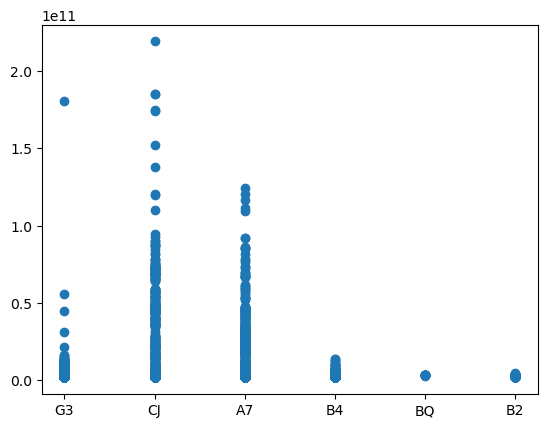

In [10]:
plt.scatter(list(df['branchId']), df['tgwLatency'])

<Axes: xlabel='branchId', ylabel='tgwLatency'>

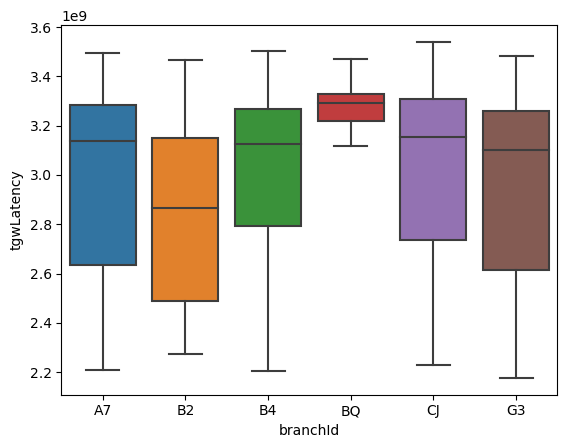

In [4]:
df['tgwLatency'].mean()
lower_percentile = 0.05
upper_percentile = 0.95
grouped = df.groupby('branchId')
filtered_data = []
for _, group in grouped:
    lower_bound = group['tgwLatency'].quantile(lower_percentile)
    upper_bound = group['tgwLatency'].quantile(upper_percentile)
    filtered_group = group[(group['tgwLatency'] >= lower_bound) & (group['tgwLatency'] <= upper_bound)]
    filtered_data.append(filtered_group)
filtered_df = pandas.concat(filtered_data)

# Plot the box and whisker plot without outliers using seaborn
sns.boxplot(data=filtered_df, x='branchId', y='tgwLatency')

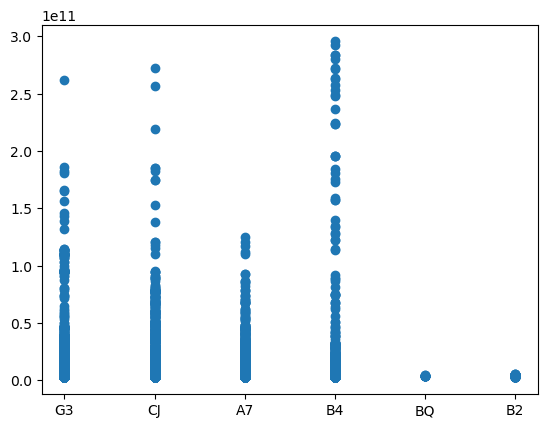

In [9]:
plt.scatter(list(df['branchId']), df['insertLinkLatency'])

<Axes: xlabel='branchId', ylabel='insertLinkLatency'>

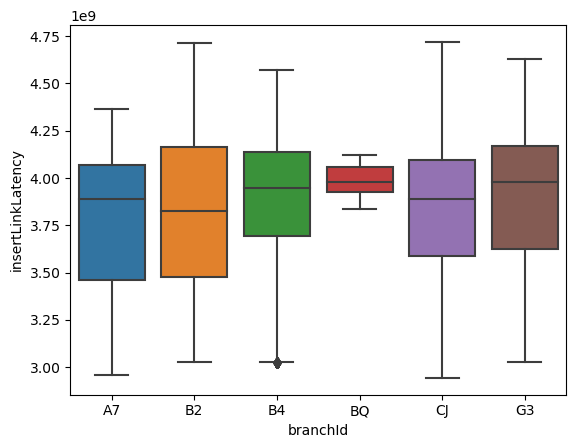

In [7]:
df['insertLinkLatency'].mean()
lower_percentile = 0.05
upper_percentile = 0.95
grouped = df.groupby('branchId')
filtered_data = []
for _, group in grouped:
    lower_bound = group['insertLinkLatency'].quantile(lower_percentile)
    upper_bound = group['insertLinkLatency'].quantile(upper_percentile)
    filtered_group = group[(group['insertLinkLatency'] >= lower_bound) & (group['insertLinkLatency'] <= upper_bound)]
    filtered_data.append(filtered_group)
filtered_df = pandas.concat(filtered_data)

# Plot the box and whisker plot without outliers using seaborn
sns.boxplot(data=filtered_df, x='branchId', y='insertLinkLatency')

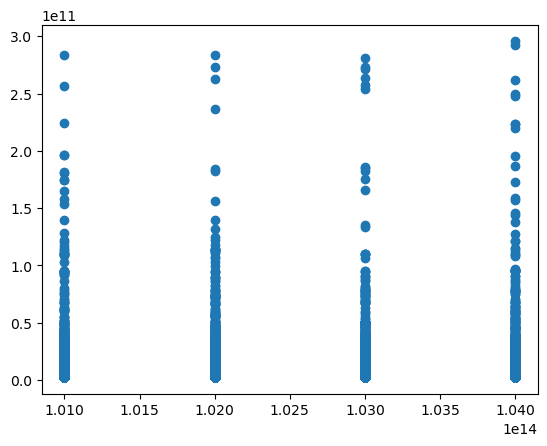

In [13]:
plt.scatter(list(df['execId']), df['insertLinkLatency'])

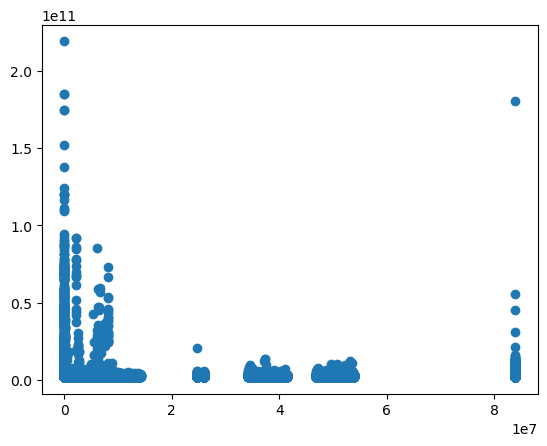

In [5]:
plt.scatter(list(df['orderRef']), df['tgwLatency'])

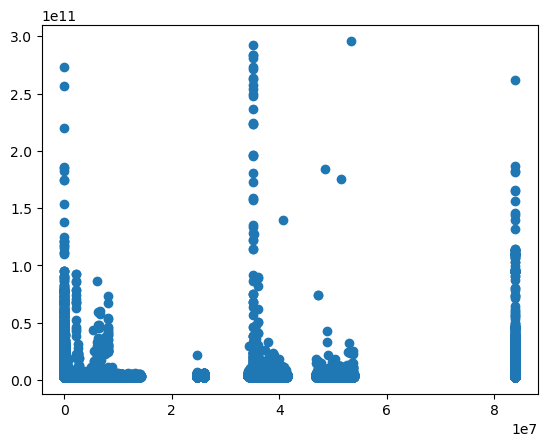

In [12]:
plt.scatter(list(df['orderRef']), df['insertLinkLatency'])

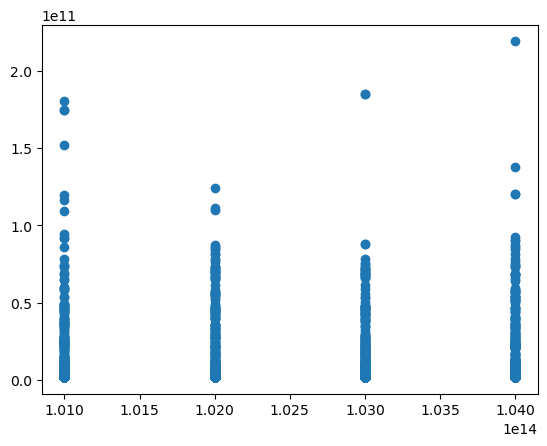

In [7]:
plt.scatter(list(df['execId']), df['tgwLatency'])

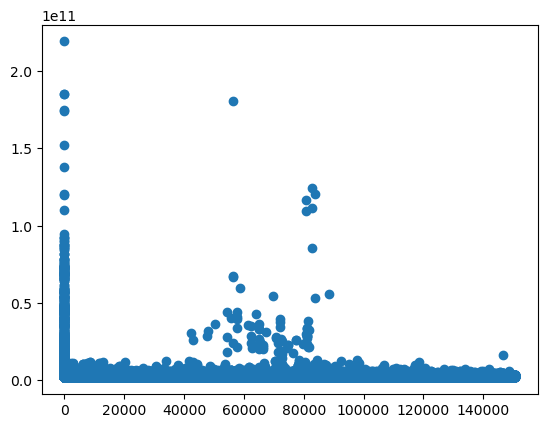

In [10]:
plt.scatter(list(df['reportIndex']), df['tgwLatency'])

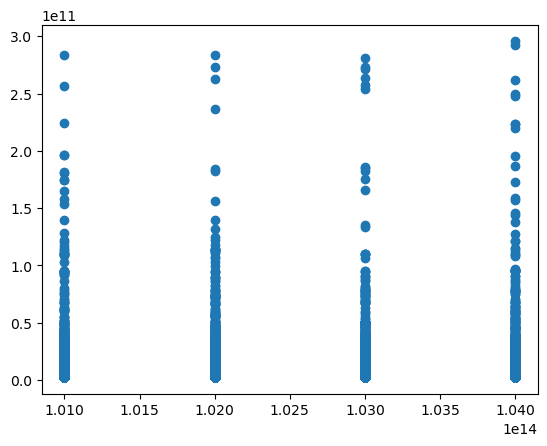

In [11]:
plt.scatter(list(df['execId']), df['insertLinkLatency'])

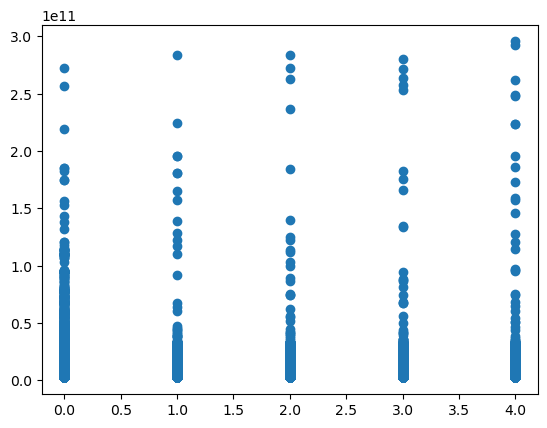

In [7]:
plt.scatter(list(df['setId']), df['insertLinkLatency'])

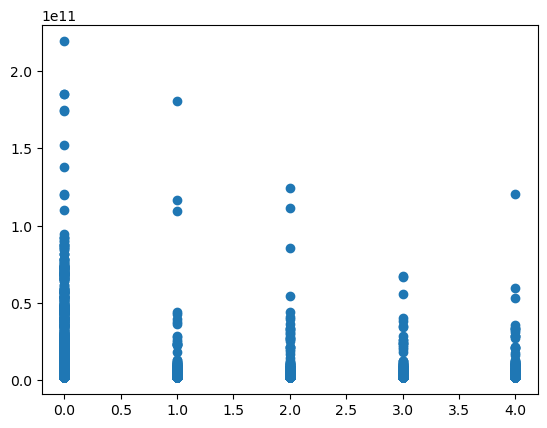

In [8]:
plt.scatter(list(df['setId']), df['tgwLatency'])

In [19]:
df.tail()

,Unnamed: 0,clientInsertReqTimestamp,insertLinkLatency,counterInsertLatency,tgwLatency,counterStatusLatency,clientInsertReqId,clientInsertReqLength,counterInsertReqId,tgwInsertRspId,counterInsertRspId,counterInsertRspLength,clientIp,reportIndex,setId,securityId,orderLocalId,fundAccountId,branchId,direction,orderType,qty,price,transactTime,orderSysId,execId,accountId,orderRef,totalPrice
2467514,2467514,2023-03-09 06:56:05.501,4974722735,479879953,4211475500,283367282,5313133573,922,5313133583,5313133625,5313133629,518,10.140.3.5,0,0,7,CJK6169P,899240386,CJ,SELL,LIMIT_ORDER,500,7.58,20230309145657620,0020RR84IQ02NRVM,101000044058241,79152343,9220,3790.0
2467515,2467515,2023-03-09 06:56:06.028,4070028594,564468938,3226890062,278669594,5313138255,926,5313138265,5313138297,5313138307,523,10.140.2.34,0,0,300619,A7K10DFN,899250379,A7,SELL,LIMIT_ORDER,200,63.88,20230309145658150,0020RR84IQ02NS24,101000044060972,34828592,2719154,12776.0
2467516,2467516,2023-03-09 06:56:06.123,4001887797,481582359,3294480657,225824781,5313139085,1058,5313139095,5313139109,5313139111,522,10.140.9.15,0,0,300570,G3K31WO1,899295748,G3,SELL,LIMIT_ORDER,400,21.73,20230309145658240,0020RR84IQ02NS4H,103000043748781,3862671,83901472,8692.0
2467517,2467517,2023-03-09 06:56:06.429,3920690625,401831672,3264842171,254016782,5313141713,880,5313141716,5313141736,5313141739,522,10.140.2.108,0,0,2343,A7K10DFP,899243047,A7,SELL,LIMIT_ORDER,100,6.47,20230309145658550,0020RR84IQ02NS6W,103000043750176,34828519,8814459,647.0
2467518,2467518,2023-03-09 06:56:06.889,3241149265,540814484,2412583531,287751250,5313145621,1059,5313145641,5313145666,5313145675,523,10.140.9.15,0,0,927,G3K31WO3,899282383,G3,BUY,LIMIT_ORDER,5300,3.05,20230309145659010,0020RR84IQ02NSBT,101000044064180,3861290,83894947,16165.0


<Axes: xlabel='setId', ylabel='insertLinkLatency'>

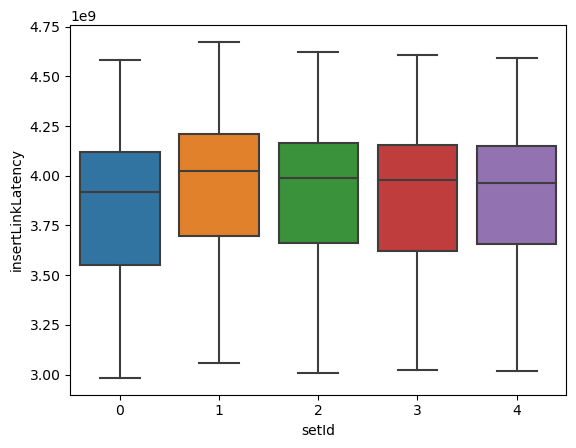

In [10]:
df['insertLinkLatency'].mean()
lower_percentile = 0.05
upper_percentile = 0.95
grouped = df.groupby('setId')
filtered_data = []
for _, group in grouped:
    lower_bound = group['insertLinkLatency'].quantile(lower_percentile)
    upper_bound = group['insertLinkLatency'].quantile(upper_percentile)
    filtered_group = group[(group['insertLinkLatency'] >= lower_bound) & (group['insertLinkLatency'] <= upper_bound)]
    filtered_data.append(filtered_group)
filtered_df = pandas.concat(filtered_data)

# Plot the box and whisker plot without outliers using seaborn
sns.boxplot(data=filtered_df, x='setId', y='insertLinkLatency')

<Axes: xlabel='setId', ylabel='tgwLatency'>

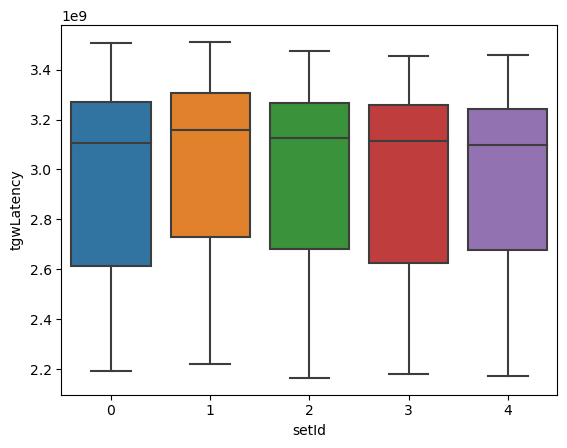

In [11]:
df['tgwLatency'].mean()
lower_percentile = 0.05
upper_percentile = 0.95
grouped = df.groupby('setId')
filtered_data = []
for _, group in grouped:
    lower_bound = group['tgwLatency'].quantile(lower_percentile)
    upper_bound = group['tgwLatency'].quantile(upper_percentile)
    filtered_group = group[(group['tgwLatency'] >= lower_bound) & (group['tgwLatency'] <= upper_bound)]
    filtered_data.append(filtered_group)
filtered_df = pandas.concat(filtered_data)

# Plot the box and whisker plot without outliers using seaborn
sns.boxplot(data=filtered_df, x='setId', y='tgwLatency')

In [14]:
df['clientInsertReqLength'].nunique()

51

<Axes: xlabel='clientInsertReqLength', ylabel='insertLinkLatency'>

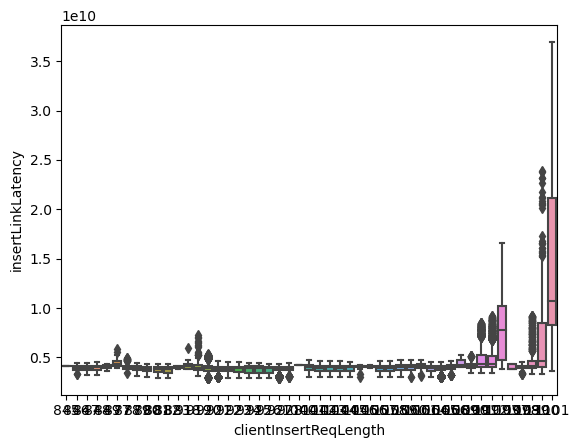

In [15]:
df['insertLinkLatency'].mean()
lower_percentile = 0.05
upper_percentile = 0.95
grouped = df.groupby('clientInsertReqLength')
filtered_data = []
for _, group in grouped:
    lower_bound = group['insertLinkLatency'].quantile(lower_percentile)
    upper_bound = group['insertLinkLatency'].quantile(upper_percentile)
    filtered_group = group[(group['insertLinkLatency'] >= lower_bound) & (group['insertLinkLatency'] <= upper_bound)]
    filtered_data.append(filtered_group)
filtered_df = pandas.concat(filtered_data)

# Plot the box and whisker plot without outliers using seaborn
sns.boxplot(data=filtered_df, x='clientInsertReqLength', y='insertLinkLatency')

<Axes: xlabel='orderType', ylabel='insertLinkLatency'>

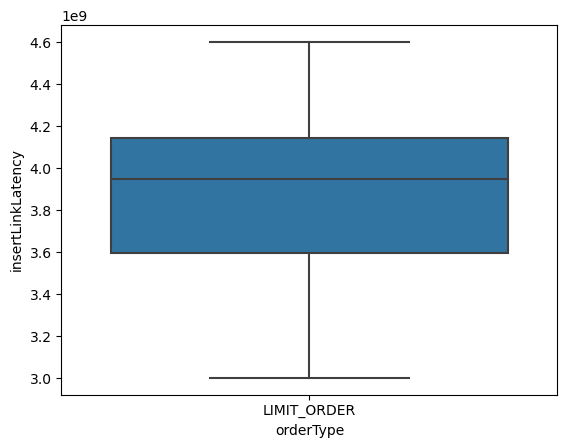

In [16]:
df['insertLinkLatency'].mean()
lower_percentile = 0.05
upper_percentile = 0.95
grouped = df.groupby('orderType')
filtered_data = []
for _, group in grouped:
    lower_bound = group['insertLinkLatency'].quantile(lower_percentile)
    upper_bound = group['insertLinkLatency'].quantile(upper_percentile)
    filtered_group = group[(group['insertLinkLatency'] >= lower_bound) & (group['insertLinkLatency'] <= upper_bound)]
    filtered_data.append(filtered_group)
filtered_df = pandas.concat(filtered_data)

# Plot the box and whisker plot without outliers using seaborn
sns.boxplot(data=filtered_df, x='orderType', y='insertLinkLatency')

In [17]:
df['orderType'].nunique()

2

<Axes: xlabel='orderType', ylabel='tgwLatency'>

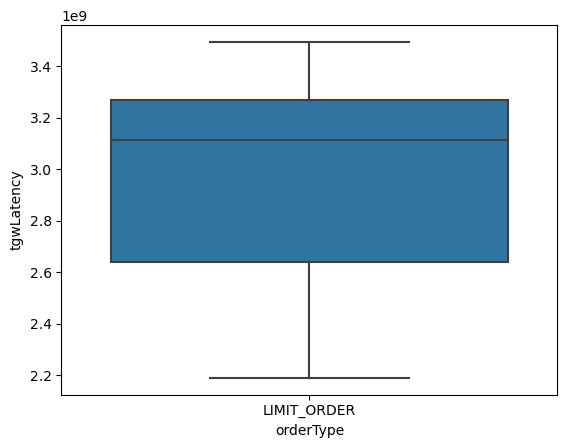

In [18]:
df['tgwLatency'].mean()
lower_percentile = 0.05
upper_percentile = 0.95
grouped = df.groupby('orderType')
filtered_data = []
for _, group in grouped:
    lower_bound = group['tgwLatency'].quantile(lower_percentile)
    upper_bound = group['tgwLatency'].quantile(upper_percentile)
    filtered_group = group[(group['tgwLatency'] >= lower_bound) & (group['tgwLatency'] <= upper_bound)]
    filtered_data.append(filtered_group)
filtered_df = pandas.concat(filtered_data)

# Plot the box and whisker plot without outliers using seaborn
sns.boxplot(data=filtered_df, x='orderType', y='tgwLatency')

In [21]:
df['qty'].nunique()

1298

In [ ]:
plt.scatter(list(df['qty']), df['tgwLatency'], alpha = 0.6)

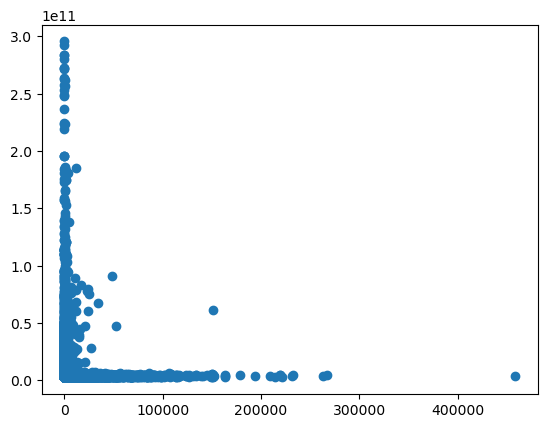

In [34]:
plt.scatter(list(df['qty']), df['insertLinkLatency'])

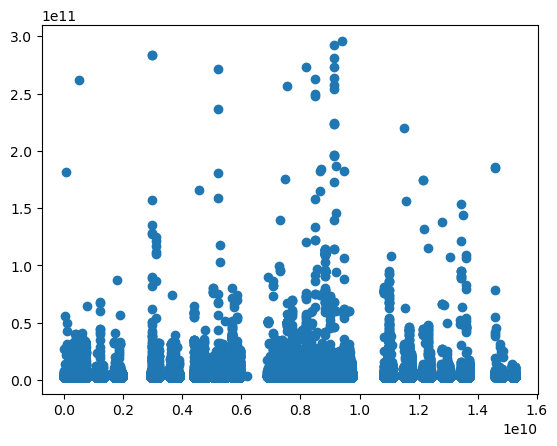

In [35]:
plt.scatter(list(df['clientInsertReqId']), df['insertLinkLatency'])

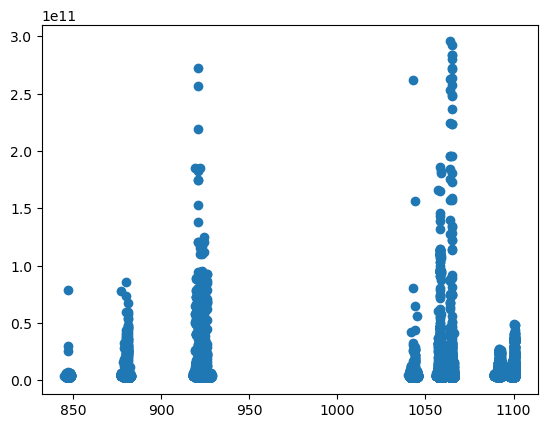

In [36]:
plt.scatter(list(df['clientInsertReqLength']), df['insertLinkLatency'])

<Axes: xlabel='clientInsertReqLength', ylabel='insertLinkLatency'>

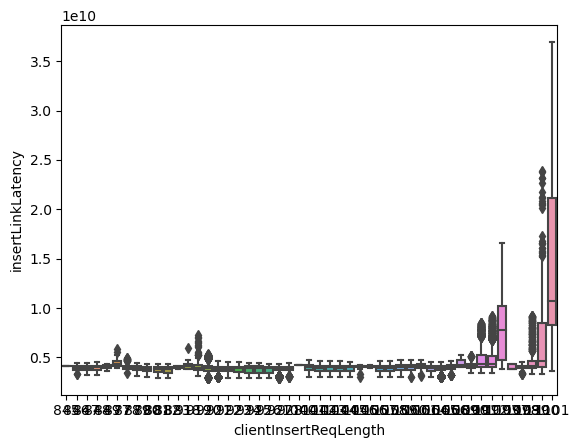

In [38]:
df['insertLinkLatency'].mean()
lower_percentile = 0.05
upper_percentile = 0.95
grouped = df.groupby('clientInsertReqLength')
filtered_data = []
for _, group in grouped:
    lower_bound = group['insertLinkLatency'].quantile(lower_percentile)
    upper_bound = group['insertLinkLatency'].quantile(upper_percentile)
    filtered_group = group[(group['insertLinkLatency'] >= lower_bound) & (group['insertLinkLatency'] <= upper_bound)]
    filtered_data.append(filtered_group)
filtered_df = pandas.concat(filtered_data)

# Plot the box and whisker plot without outliers using seaborn
sns.boxplot(data=filtered_df, x='clientInsertReqLength', y='insertLinkLatency')